##Magnetic Force Simulator

This is a software suite designed to simulate the distribution and forces between fictious "point magnetic charges" as they appear on magnetized surfaces. Limited functionality right now in terms of availible geometries and charge distributions, but can be expanded. There are some improper implementations of inheritance issues which have yet to be fixed.

Plotting of charge distributions and corresponding forces as a function of gaps is made availible via matplotlib. 

Designed by Primus Lam in 2015 for Surgitronic Inc. 

In [3]:
import math

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%run source/magnet_define.py
%run source/magnet_shapes.py

%matplotlib inline

## Charge Distributions

In this simulation, magnets are represented as distribution of charges, fixed in position relative to each other. Source code contains predefined magnet shapes, as well as methods for visualising them in $\mathbb{R}^3$ and computing force vectors between different magnets.

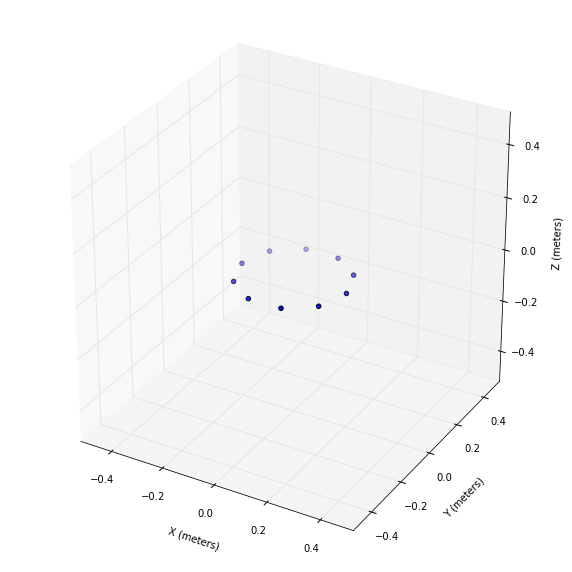

In [2]:
demo_ring = MagnetRing(coor(0, 0, 0), 0.1, 0.3, 0.7, density=10, color='b')
plot_magnet([demo_ring], .5)

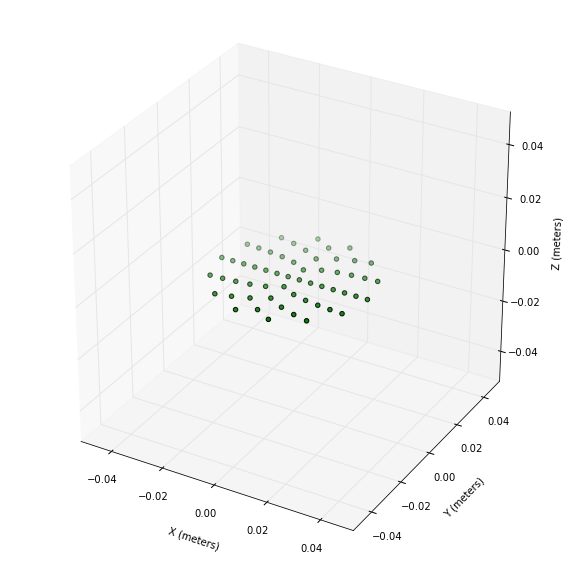

In [3]:
demo_disk = MagnetDisk(coor(0, 0, 0), 0.0, 0.03, 0.7, density=7, color='g')
plot_magnet([demo_disk], .05)

112


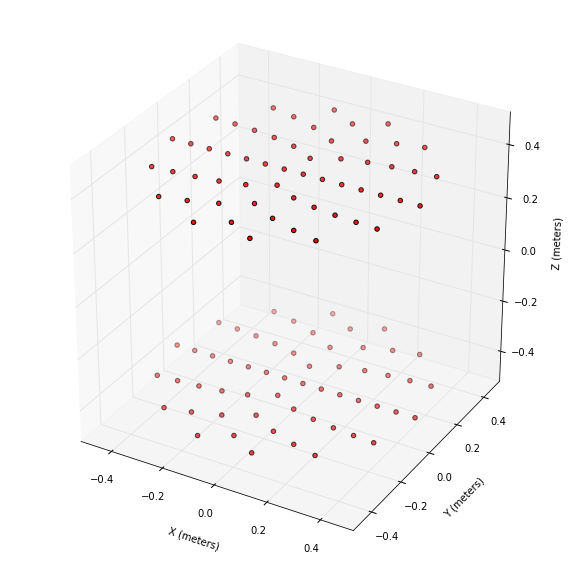

In [4]:
demo_cylinder = MagnetCylinder(coor(0, 0, .4), 0.5, 0.8, 0.05, density=7, color='r')
print(demo_cylinder.size())
plot_magnet([demo_cylinder], .5)

## Combining and Modifying Distributions

It's also possible to combine different magnets or transform and rotate their positions.

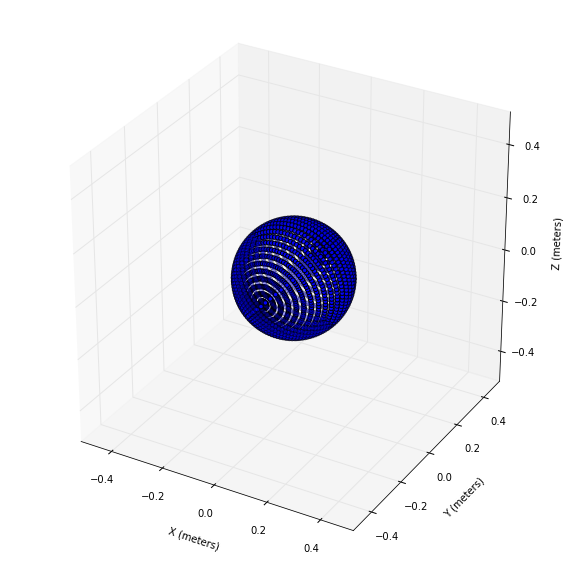

In [23]:
demo_ring1 = MagnetRing(coor(0, 0, 0), 0.1, 0.3, 0.7, density=50, color='b')
plot_magnet([demo_ring1.rotate(coor(0, 0, 0), coor(0, 1, 0), theta) for theta in np.linspace(0, PI, 50)], .5)

## Actual Simulations

In this section, we carry out two simulations using the predefined functions. Of particular note is the force vector given by em.force_on(perm), which indicates the force the electromagnet exerts on the permanent magnet. The systems are set up to be symmetrical in the X and Y axes, so the only force should be the third coordinate, the Z-dimension. Units of length are in meters, flux in Teslas, and force in Newtons. 


<b>Lift electromagnet and Cylinder magnet</b><br>

The first simulation uses the normal cylindrical lift electromagnet and its attraction to a cylindrical, axially magentized magnet.

<b>Proposed magnet geometry</b><br>
This is the proposed magnet geometry as specified in Draft EM Anchor Design, 2015-11-01. The dimensional surface geometry of the internal magnet is incorrect, as I'm simulating it using a bar shape instead of a cylinder shape. Until I learn how to distribute charges along the curved surface of a cylinder magnet though, this is a decent approximation.

Also, the computations for flux are a complete estimate as well. Until I better understand magnetic circuits, such as somebody answering the questions I sent out in email, I'm not 100% how to compute that correctly.